## Data analysis of Strathclyde Refit Data

### Set Up

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import pandas as pd
import os
fp=r'C:\Users\cvyb\OneDrive - Loughborough University\ERBE_YB\Energy Analysis\Course Work\CLEAN_REFIT_081116'

## Data processing

### This loads the data, resamples it to half hour intervals and saves the new data files.

In [8]:
#df

,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,Issues,file
0,2013-12-17 17:00:00,1.387301e+09,197.923077,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,5.0,0.0,0.000000,CLEAN_House9.csv
1,2013-12-17 17:30:00,1.387302e+09,221.081081,33.564189,0.0,0.0,0.000000,1.000000,0.000000,0.000000,5.0,0.0,0.000000,CLEAN_House9.csv
2,2013-12-17 18:00:00,1.387304e+09,226.385906,3.087248,0.0,0.0,0.000000,1.000000,0.000000,0.000000,5.0,0.0,0.000000,CLEAN_House9.csv
3,2013-12-17 18:30:00,1.387306e+09,2394.153257,136.325670,0.0,0.0,0.000000,1.000000,0.000000,289.946360,5.0,0.0,0.011494,CLEAN_House9.csv
4,2013-12-17 19:00:00,1.387308e+09,976.642140,62.327759,0.0,0.0,0.000000,40.000000,0.000000,0.000000,5.0,0.0,0.000000,CLEAN_House9.csv
5,2013-12-17 19:30:00,1.387309e+09,902.620805,64.862416,0.0,0.0,0.000000,90.516779,0.000000,0.000000,5.0,0.0,0.000000,CLEAN_House9.csv
6,2013-12-17 20:00:00,1.387311e+09,869.301003,30.775920,0.0,0.0,0.000000,89.652174,0.000000,0.000000,5.0,0.0,0.000000,CLEAN_House9.csv
7,2013-12-17 20:30:00,1.387313e+09,862.390000,20.430000,0.0,0.0,0.000000,89.596667,0.000000,0.000000,5.0,0.0,0.000000,CLEAN_House9.csv
8,2013-12-17 21:00:00,1.387315e+09,871.685811,29.753378,0.0,0.0,0.000000,89.418919,0.000000,0.000000,5.0,0.0,0.000000,CLEAN_House9.csv
9,2013-12-17 21:30:00,1.387317e+09,994.600000,41.776667,0.0,0.0,0.000000,89.570000,0.000000,150.203333,5.0,0.0,0.003333,CLEAN_House9.csv


In [25]:
mydir = os.chdir('/Users/cvyb\OneDrive - Loughborough University/ERBE_YB/Energy Analysis/Course Work/CLEAN_REFIT_081116')

In [240]:
myFile = os.listdir(mydir)
myFile2 = os.path.splitext(myFile[1])[0].rsplit('_', 1)[1]
#myFile2.rsplit('_', 1)[1]
myFile

#testName = os.path.splitext(myFile)[0]#.rsplit('_', 1)[1]

['CLEAN_House1.csv',
 'CLEAN_House10.csv',
 'CLEAN_House11.csv',
 'CLEAN_House12.csv',
 'CLEAN_House13.csv',
 'CLEAN_House15.csv',
 'CLEAN_House16.csv',
 'CLEAN_House17.csv',
 'CLEAN_House18.csv',
 'CLEAN_House19.csv',
 'CLEAN_House2.csv',
 'CLEAN_House20.csv',
 'CLEAN_House21.csv',
 'CLEAN_House3.csv',
 'CLEAN_House4.csv',
 'CLEAN_House5.csv',
 'CLEAN_House6.csv',
 'CLEAN_House7.csv',
 'CLEAN_House8.csv',
 'CLEAN_House9.csv']

In [71]:
for fileName in os.listdir(mydir):
    splitFileName = os.path.splitext(fileName)[0].rsplit('_', 1)[1]
    addFileName = os.path.join(fp,filename)
    print(splitFileName)
    #print(fileName)

House1
House10
House11
House12
House13
House15
House16
House17
House18
House19
House2
House20
House21
House3
House4
House5
House6
House7
House8
House9


In [56]:
myPath = os.path.join(myFile[1], myFile2)
myPath

'CLEAN_House10.csv\\House10'

In [295]:
myData0 = (pd.read_csv('CLEAN_House10.csv', usecols = ['Time', 'Aggregate'], index_col = 'Time', parse_dates=['Time'])
          .resample('D').mean()
          .rename(columns = {'Aggregate': 'AggregatePower_Watts'})
          )


In [359]:
myData = (myData0
          .assign(AggregatePower_kW = myData0['AggregatePower_Watts'] / 1000)
          .assign(TestHouse = myFile2)
          #.fillna(None, method = 'ffill')
          #.fillna(.mean())['AggregatePower_Watts', 'AggregatePower_kW']
          #.fillna(method = 'ffill')
          #.to_numeric(self["AggregatePower_Watts"])
          )

myData1 = myData.fillna(myData.mean())

In [362]:
myData1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 588 entries, 2013-11-20 to 2015-06-30
Freq: D
Data columns (total 3 columns):
AggregatePower_Watts    588 non-null float64
AggregatePower_kW       588 non-null float64
TestHouse               588 non-null object
dtypes: float64(2), object(1)
memory usage: 18.4+ KB


In [347]:
#myData.head()
myData.isnull().sum()


AggregatePower_Watts    0
AggregatePower_kW       0
TestHouse               0
dtype: int64

In [348]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 588 entries, 2013-11-20 to 2015-06-30
Freq: D
Data columns (total 3 columns):
AggregatePower_Watts    588 non-null float64
AggregatePower_kW       588 non-null float64
TestHouse               588 non-null object
dtypes: float64(2), object(1)
memory usage: 18.4+ KB


PLOT_FILENAME: test.png


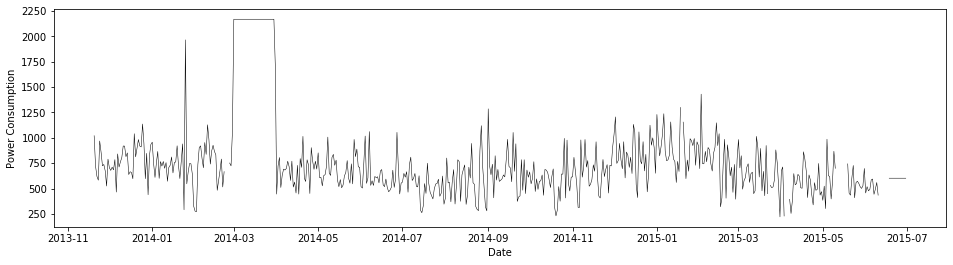

In [308]:
#myData['AggergatePower_Watts'].plot()

dff1 = myData['AggregatePower_Watts']

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig, ax = plt.subplots(1,figsize=(16,4))
ax.plot(dff1,color='black',linewidth=0.5)
ax.set_xlabel('Date')
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('Power Consumption')
plot_filename0 = r'test.png'
print('PLOT_FILENAME: '+plot_filename0)
#plt.savefig(plot_filename, bbox_inches='tight')
plt.show()




In [364]:
data_container = []

#flag = True

for filename in os.listdir(mydir):
    print(filename)
    splitFileName = os.path.splitext(filename)[0].rsplit('_', 1)[1]
    #path=os.path.join(fp,filename)
    
    mydf0 = (pd.read_csv(filename, usecols = ['Time', 'Aggregate'], index_col = 'Time', parse_dates=['Time'])
          .resample('D').mean()
          .rename(columns = {'Aggregate': 'AggregatePower_Watts'}))
    
    mydf1 = (mydf0
          .assign(AggregatePower_kW = mydf0['AggregatePower_Watts'] / 1000)
          .assign(TestHouse = splitFileName)
          #.fillna(None, method = 'pad')
          )
    mydf = mydf1.fillna(mydf1.mean())
    
    data_container.append(mydf)
    

all_data = pd.concat(data_container, axis = 0)

#all_data.to_csv('myData.csv')


CLEAN_House1.csv
CLEAN_House10.csv
CLEAN_House11.csv
CLEAN_House12.csv
CLEAN_House13.csv
CLEAN_House15.csv
CLEAN_House16.csv
CLEAN_House17.csv
CLEAN_House18.csv
CLEAN_House19.csv
CLEAN_House2.csv
CLEAN_House20.csv
CLEAN_House21.csv
CLEAN_House3.csv
CLEAN_House4.csv
CLEAN_House5.csv
CLEAN_House6.csv
CLEAN_House7.csv
CLEAN_House8.csv
CLEAN_House9.csv


In [365]:
all_data.to_csv('myData01.csv')

In [386]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10900 entries, 2013-10-09 to 2015-07-08
Data columns (total 3 columns):
AggregatePower_Watts    10900 non-null float64
AggregatePower_kW       10900 non-null float64
TestHouse               10900 non-null object
dtypes: float64(2), object(1)
memory usage: 340.6+ KB


In [392]:
all_data.head()

,AggregatePower_Watts,AggregatePower_kW,TestHouse
Time,,,
2013-10-09,505.408211,0.505408,House1
2013-10-10,581.340814,0.581341,House1
2013-10-11,236.599883,0.236600,House1
2013-10-12,215.318503,0.215319,House1
2013-10-13,214.515313,0.214515,House1


In [366]:
#all_data.sort_values(ascending = True)


### Plotting

TestHouse
House1     AxesSubplot(0.125,0.125;0.775x0.755)
House10    AxesSubplot(0.125,0.125;0.775x0.755)
House11    AxesSubplot(0.125,0.125;0.775x0.755)
House12    AxesSubplot(0.125,0.125;0.775x0.755)
House13    AxesSubplot(0.125,0.125;0.775x0.755)
House15    AxesSubplot(0.125,0.125;0.775x0.755)
House16    AxesSubplot(0.125,0.125;0.775x0.755)
House17    AxesSubplot(0.125,0.125;0.775x0.755)
House18    AxesSubplot(0.125,0.125;0.775x0.755)
House19    AxesSubplot(0.125,0.125;0.775x0.755)
House2     AxesSubplot(0.125,0.125;0.775x0.755)
House20    AxesSubplot(0.125,0.125;0.775x0.755)
House21    AxesSubplot(0.125,0.125;0.775x0.755)
House3     AxesSubplot(0.125,0.125;0.775x0.755)
House4     AxesSubplot(0.125,0.125;0.775x0.755)
House5     AxesSubplot(0.125,0.125;0.775x0.755)
House6     AxesSubplot(0.125,0.125;0.775x0.755)
House7     AxesSubplot(0.125,0.125;0.775x0.755)
House8     AxesSubplot(0.125,0.125;0.775x0.755)
House9     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

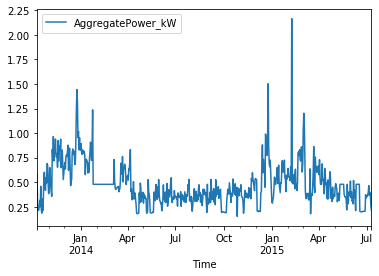

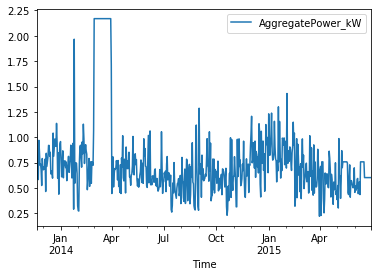

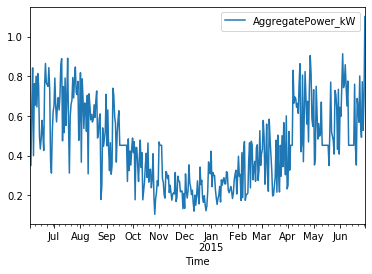

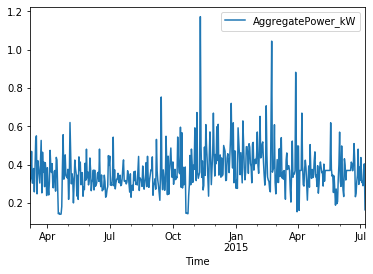

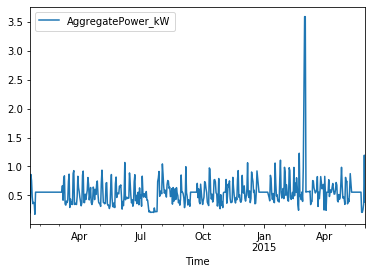

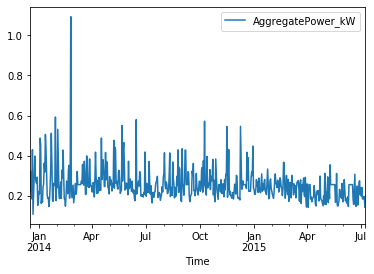

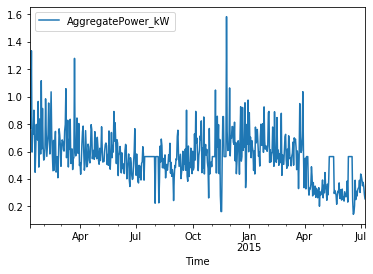

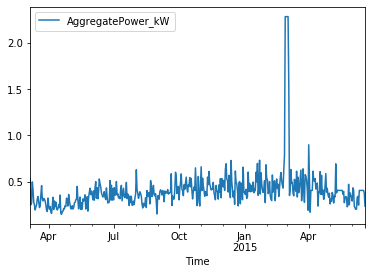

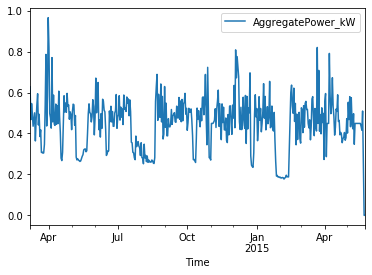

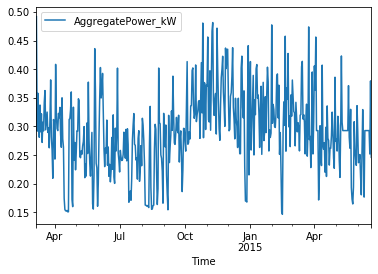

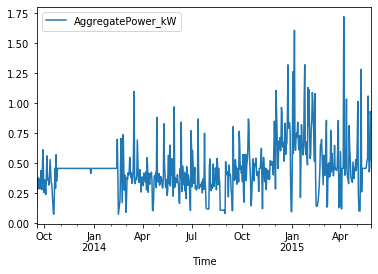

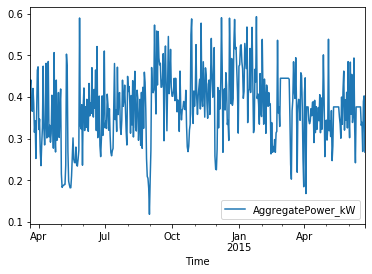

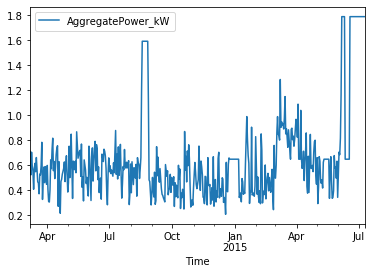

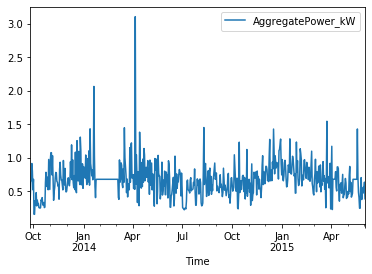

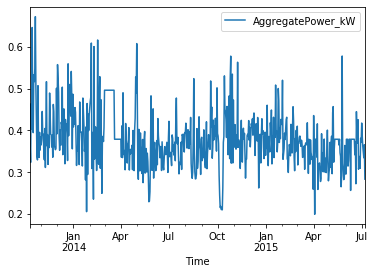

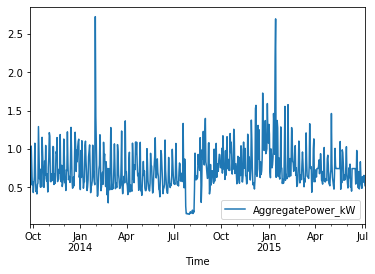

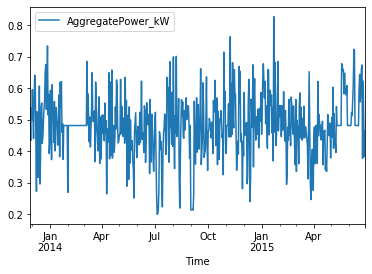

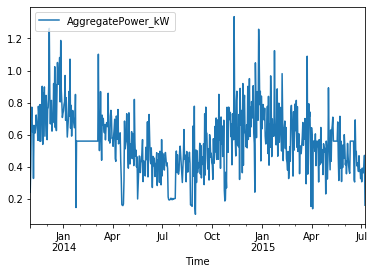

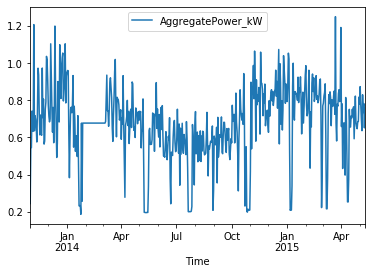

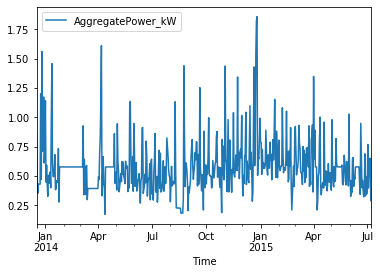

In [395]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
#import seaborn as sns

df_plot = all_data[['AggregatePower_kW', 'TestHouse']]
#pairboxplot(data = all_data, )
#df_plot.head()

#sns.relplot(x = 'Time', y = 'AggregatePower_kW', hue = 'TestHouse', data = all_data)

df_plot.groupby('TestHouse').plot(use_index=True, y='AggregatePower_kW')


In [146]:
flag=True
for filename in os.listdir(fp):
    print(filename)
    path=os.path.join(fp,filename)
    df=pd.read_csv(path,parse_dates=['Time'])
    df=df.set_index('Time')
    df=df.resample('30T').mean()
    df=df.reset_index()
    df['file']=filename
    if flag:
        df2=df
        flag=False
    else:
        df2=df2.append(df)
df2.to_csv('NewData.csv')

CLEAN_House1.csv
CLEAN_House10.csv
CLEAN_House11.csv
CLEAN_House12.csv
CLEAN_House13.csv
CLEAN_House15.csv
CLEAN_House16.csv
CLEAN_House17.csv
CLEAN_House18.csv
CLEAN_House19.csv
CLEAN_House2.csv
CLEAN_House20.csv
CLEAN_House21.csv
CLEAN_House3.csv
CLEAN_House4.csv
CLEAN_House5.csv
CLEAN_House6.csv
CLEAN_House7.csv
CLEAN_House8.csv
CLEAN_House9.csv


### Import Combine Data

In [5]:
mydf = pd.read_csv('NewData.csv')

In [7]:
mydf.head()

,Unnamed: 0,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,Issues,file
0,0,2013-10-09 13:00:00,1.381325e+09,1443.930736,38.961039,7.506494,5.086580,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,CLEAN_House1.csv
1,1,2013-10-09 13:30:00,1.381326e+09,601.003367,0.000000,27.562290,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,CLEAN_House1.csv
2,2,2013-10-09 14:00:00,1.381328e+09,937.972881,0.206780,17.962712,68.718644,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,CLEAN_House1.csv
3,3,2013-10-09 14:30:00,1.381330e+09,350.345196,5.615658,18.455516,13.512456,0.0,0.0,0.0,0.0,0.0,1.0,0.003559,CLEAN_House1.csv
4,4,2013-10-09 15:00:00,1.381332e+09,423.656463,70.704082,28.840136,5.891156,0.0,0.0,0.0,0.0,0.0,1.0,0.006803,CLEAN_House1.csv


In [9]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522113 entries, 0 to 522112
Data columns (total 15 columns):
Unnamed: 0    522113 non-null int64
Time          522113 non-null object
Unix          462255 non-null float64
Aggregate     462255 non-null float64
Appliance1    462255 non-null float64
Appliance2    462255 non-null float64
Appliance3    462255 non-null float64
Appliance4    462255 non-null float64
Appliance5    462255 non-null float64
Appliance6    462255 non-null float64
Appliance7    462255 non-null float64
Appliance8    462255 non-null float64
Appliance9    462255 non-null float64
Issues        462255 non-null float64
file          522113 non-null object
dtypes: float64(12), int64(1), object(2)
memory usage: 59.8+ MB


### Present Data in Daily Energy Aggregate Consumption

In [7]:
df1=df1.resample('1D').mean()

NameError: name 'df1' is not defined

In [6]:
df1

NameError: name 'df1' is not defined

### Present Daily Energy Consumption Data as a Graph

NameError: name 'df1' is not defined

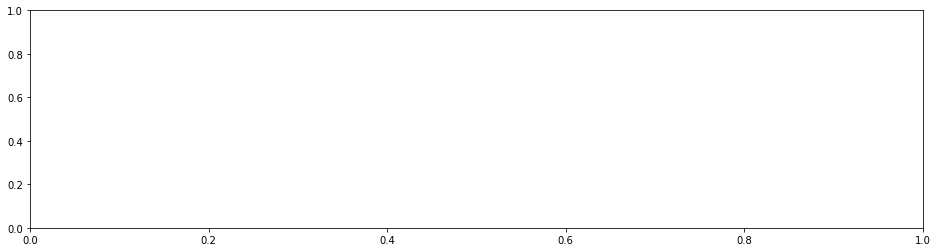

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig, ax = plt.subplots(1,figsize=(16,4))
ax.plot(df1,color='black',linewidth=0.5)
ax.set_xlabel('Date')
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('Consumption')
plot_filename=r'test.png'
print('PLOT_FILENAME: '+plot_filename)
#plt.savefig(plot_filename, bbox_inches='tight')
plt.show()